<a href="https://colab.research.google.com/github/RobertSloan22/AppliedDataScience/blob/main/Copy_of_getitdone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikeras


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Deep learning/LiveSession/pipline2.csv')

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the missing values for each column
print(missing_values)


id                                   0
slug                                 0
slug_me                            410
slug_display                         0
v2_floor1h                         411
v2_floor24h                          0
v2_floor7d                           0
v2_buy_now_price                    88
v2_buy_now_price_net_fees           88
v2_sell_now_price                    2
v2_sell_now_price_net_fees           2
v2_num_listed                        0
v2_num_mints                         0
v2_sales1h                           0
v2_sales24h                          0
v2_sales7d                           0
v2_volume1h                          0
v2_volume24h                         0
v2_volume7d                          0
first_list_date                      0
name                                 0
data_retrieved_at                    0
orders_linear                        0
orders_exponential                   0
orders_min_delta                   399
orders_max_delta         

In [ ]:
# Fill missing numerical values with median
for column in df.select_dtypes(include=['float64', 'int64']):
    df[column].fillna(df[column].median(), inplace=True)




In [ ]:
df.isnull().sum()

id                                   0
slug                                 0
slug_me                            410
slug_display                         0
v2_floor1h                           0
v2_floor24h                          0
v2_floor7d                           0
v2_buy_now_price                     0
v2_buy_now_price_net_fees            0
v2_sell_now_price                    0
v2_sell_now_price_net_fees           0
v2_num_listed                        0
v2_num_mints                         0
v2_sales1h                           0
v2_sales24h                          0
v2_sales7d                           0
v2_volume1h                          0
v2_volume24h                         0
v2_volume7d                          0
first_list_date                      0
name                                 0
data_retrieved_at                    0
orders_linear                        0
orders_exponential                   0
orders_min_delta                     0
orders_max_delta         

In [ ]:
df = df.drop('slug_me', axis=1)


In [ ]:
df.head()

id                                  slug  \
0  594b6808-9527-426a-999b-07fbb6a3aa69  594b6808-9527-426a-999b-07fbb6a3aa69   
1  05c52d84-2e49-4ed9-a473-b43cab41e777  05c52d84-2e49-4ed9-a473-b43cab41e777   
2  099c4f20-fd22-44b3-af6d-43d2b9f4cf21  099c4f20-fd22-44b3-af6d-43d2b9f4cf21   
3  ae80aafd-0534-49e2-9c3e-bc751467d7e5  ae80aafd-0534-49e2-9c3e-bc751467d7e5   
4  bd366797-5599-417a-be03-1e43a7e3fb90  bd366797-5599-417a-be03-1e43a7e3fb90   

      slug_display  v2_floor1h  v2_floor24h  v2_floor7d  v2_buy_now_price  \
0    cryptoundeads     -0.0217       0.1445      0.0000      1.125000e+10   
1       tensorians     -0.0004      -0.0741     -0.1951      7.439000e+10   
2         froganas      0.0085       0.3537      0.1273      6.200000e+09   
3  sujiko_warriors     -0.0197       0.0473      0.0000      5.980000e+09   
4          madlads     -0.0101      -0.0117      0.0125      1.620000e+11   

   v2_buy_now_price_net_fees  v2_sell_now_price  v2_sell_now_price_net_fees  \
0               1.209375e+10       1.231000e+10                1.150985e+10   
1               7.773755e+10       7.630000e+10                7.286650e+10   
2               6.293000e+09       6.530000e+09                6.432050e+09   
3               6.368700e+09       6.281515e+09                5.873216e+09   
4               1.712340e+11       1.680100e+11                1.584334e+11   

   ...  orders_nfts_held  orders_pool_trade  orders_pool_nft  \
0  ...                23                 40                3   
1  ...                 0                  0                0   
2  ...                54                 66                1   
3  ...                24                 21                1   
4  ...                18                 44                0   

   orders_pool_token  orders_starting_price_min  orders_starting_price_max  \
0                495                        0.0               1.450000e+10   
1                  0                  3000000.0               6.790000e+09   
2                684                        0.0               1.900000e+10   
3                346                        0.0               2.000000e+10   
4                312                        0.0               1.792100e+11   

   orders_starting_price_avg  orders_starting_price_std orders_nfts_sold  \
0               7.497594e+09               3.471032e+09              115   
1               2.271678e+09               1.370111e+09                0   
2               4.410737e+09               1.856737e+09              227   
3               4.706550e+09               2.053297e+09               10   
4               8.744950e+10               4.878455e+10               17   

  orders_nfts_bought  
0                700  
1                  0  
2               1391  
3                133  
4                144  

[5 rows x 40 columns]

In [ ]:
df = df.drop('id', axis=1)


In [ ]:
df = df.drop('slug', axis=1)


In [ ]:
df.info

<bound method DataFrame.info of            slug_display  v2_floor1h  v2_floor24h  v2_floor7d  \
0         cryptoundeads     -0.0217       0.1445      0.0000   
1            tensorians     -0.0004      -0.0741     -0.1951   
2              froganas      0.0085       0.3537      0.1273   
3       sujiko_warriors     -0.0197       0.0473      0.0000   
4               madlads     -0.0101      -0.0117      0.0125   
...                 ...         ...          ...         ...   
7045  honeyland_tickets      0.0000      -0.1671     -0.0005   
7046              airia      0.0000       0.0345     -0.0991   
7047           bonkznft     -0.0321      -0.1018     -0.2665   
7048                mdp      0.0000       0.0000      0.1434   
7049         lilbonkerz     -0.0011       0.2700      0.0000   

      v2_buy_now_price  v2_buy_now_price_net_fees  v2_sell_now_price  \
0         1.125000e+10               1.209375e+10       1.231000e+10   
1         7.439000e+10               7.773755e+10      

In [ ]:
df = df.drop('v2_buy_now_price_net_fees', axis=1)
df = df.drop('v2_sell_now_price_net_fees', axis=1)
df.head()


slug_display  v2_floor1h  v2_floor24h  v2_floor7d  v2_buy_now_price  \
0    cryptoundeads     -0.0217       0.1445      0.0000      1.125000e+10   
1       tensorians     -0.0004      -0.0741     -0.1951      7.439000e+10   
2         froganas      0.0085       0.3537      0.1273      6.200000e+09   
3  sujiko_warriors     -0.0197       0.0473      0.0000      5.980000e+09   
4          madlads     -0.0101      -0.0117      0.0125      1.620000e+11   

   v2_sell_now_price  v2_num_listed  v2_num_mints  v2_sales1h  v2_sales24h  \
0       1.231000e+10            743         10000          69         1745   
1       7.630000e+10            342         10003           5          200   
2       6.530000e+09            982          5555         251         1993   
3       6.281515e+09            404          4444         245          753   
4       1.680100e+11            412          9968           1           22   

   ...  orders_nfts_held  orders_pool_trade  orders_pool_nft  \
0  ...                23                 40                3   
1  ...                 0                  0                0   
2  ...                54                 66                1   
3  ...                24                 21                1   
4  ...                18                 44                0   

   orders_pool_token orders_starting_price_min orders_starting_price_max  \
0                495                       0.0              1.450000e+10   
1                  0                 3000000.0              6.790000e+09   
2                684                       0.0              1.900000e+10   
3                346                       0.0              2.000000e+10   
4                312                       0.0              1.792100e+11   

  orders_starting_price_avg  orders_starting_price_std  orders_nfts_sold  \
0              7.497594e+09               3.471032e+09               115   
1              2.271678e+09               1.370111e+09                 0   
2              4.410737e+09               1.856737e+09               227   
3              4.706550e+09               2.053297e+09                10   
4              8.744950e+10               4.878455e+10                17   

   orders_nfts_bought  
0                 700  
1                   0  
2                1391  
3                 133  
4                 144  

[5 rows x 36 columns]

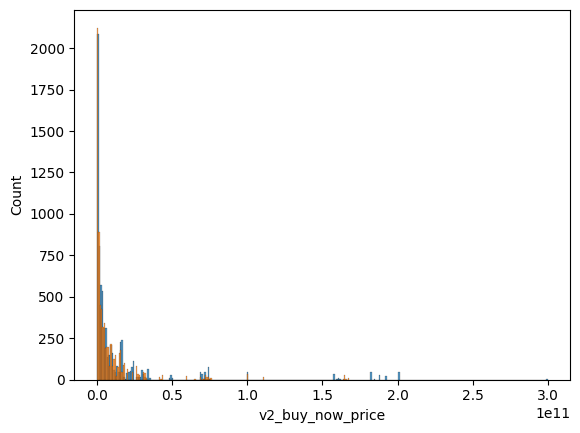

In [ ]:
sns.histplot(df['v2_buy_now_price'])
sns.histplot(df['v2_sell_now_price'])
plt.show()

In [ ]:
df.describe(include="all")

slug_display   v2_floor1h  v2_floor24h   v2_floor7d  \
count              7050  7050.000000  7050.000000  7050.000000   
unique              181          NaN          NaN          NaN   
top     famous_fox_dens          NaN          NaN          NaN   
freq                 48          NaN          NaN          NaN   
mean                NaN     0.001860     0.059348     0.143045   
std                 NaN     0.108494     0.444754     0.739642   
min                 NaN    -0.986000    -0.987000    -0.930900   
25%                 NaN    -0.000300    -0.048675    -0.098300   
50%                 NaN     0.000000    -0.003700     0.000000   
75%                 NaN     0.000000     0.055300     0.143050   
max                 NaN     3.600000     5.750000     8.780000   

        v2_buy_now_price  v2_sell_now_price  v2_num_listed  v2_num_mints  \
count       7.050000e+03       7.050000e+03    7050.000000  7.050000e+03   
unique               NaN                NaN            NaN           NaN   
top                  NaN                NaN            NaN           NaN   
freq                 NaN                NaN            NaN           NaN   
mean        1.385950e+10       8.585659e+09     700.873475  4.318717e+04   
std         3.274422e+10       1.875395e+10    2699.574118  5.985105e+05   
min         1.900000e+05       1.500000e+04       0.000000  5.000000e+01   
25%         7.370526e+08       5.788215e+08      94.250000  2.222000e+03   
50%         3.280000e+09       2.800000e+09     324.000000  5.000000e+03   
75%         1.115000e+10       9.221000e+09     587.000000  9.968000e+03   
max         3.000000e+11       1.680200e+11   30818.000000  1.123855e+07   

         v2_sales1h   v2_sales24h  ...  orders_nfts_held  orders_pool_trade  \
count   7050.000000   7050.000000  ...       7050.000000        7050.000000   
unique          NaN           NaN  ...               NaN                NaN   
top             NaN           NaN  ...               NaN                NaN   
freq            NaN           NaN  ...               NaN                NaN   
mean      18.125532    644.284823  ...         26.646950           8.736312   
std      145.202231   4840.315473  ...         68.305017          18.898647   
min        0.000000      1.000000  ...          0.000000           0.000000   
25%        0.000000      8.000000  ...          0.000000           0.000000   
50%        1.000000     27.000000  ...          4.000000           3.000000   
75%        3.000000     90.000000  ...         25.000000           9.000000   
max     4327.000000  67116.000000  ...       1057.000000         187.000000   

        orders_pool_nft  orders_pool_token orders_starting_price_min  \
count       7050.000000        7050.000000              7.050000e+03   
unique              NaN                NaN                       NaN   
top                 NaN                NaN                       NaN   
freq                NaN                NaN                       NaN   
mean           0.683262          63.117730              2.779357e+08   
std            1.231112         152.724029              9.439895e+08   
min            0.000000           0.000000              0.000000e+00   
25%            0.000000           9.000000              1.000000e+04   
50%            0.000000          17.000000              3.000000e+06   
75%            1.000000          52.000000              3.000000e+07   
max           11.000000        1253.000000              7.600000e+09   

       orders_starting_price_max orders_starting_price_avg  \
count               7.050000e+03              7.050000e+03   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                1.425333e+10              5.028372e+09   
std                 2.578771e+10              8.880934e+09   
min                 2.200000e+07              1.188074e+0

array([[<Axes: title={'center': 'v2_floor1h'}>,
        <Axes: title={'center': 'v2_floor24h'}>,
        <Axes: title={'center': 'v2_floor7d'}>,
        <Axes: title={'center': 'v2_buy_now_price'}>,
        <Axes: title={'center': 'v2_sell_now_price'}>,
        <Axes: title={'center': 'v2_num_listed'}>],
       [<Axes: title={'center': 'v2_num_mints'}>,
        <Axes: title={'center': 'v2_sales1h'}>,
        <Axes: title={'center': 'v2_sales24h'}>,
        <Axes: title={'center': 'v2_sales7d'}>,
        <Axes: title={'center': 'v2_volume1h'}>,
        <Axes: title={'center': 'v2_volume24h'}>],
       [<Axes: title={'center': 'v2_volume7d'}>,
        <Axes: title={'center': 'orders_linear'}>,
        <Axes: title={'center': 'orders_exponential'}>,
        <Axes: title={'center': 'orders_min_delta'}>,
        <Axes: title={'center': 'orders_max_delta'}>,
        <Axes: title={'center': 'orders_avg_delta'}>],
       [<Axes: title={'center': 'orders_recent_transactions_1hr'}>,
        <Axe

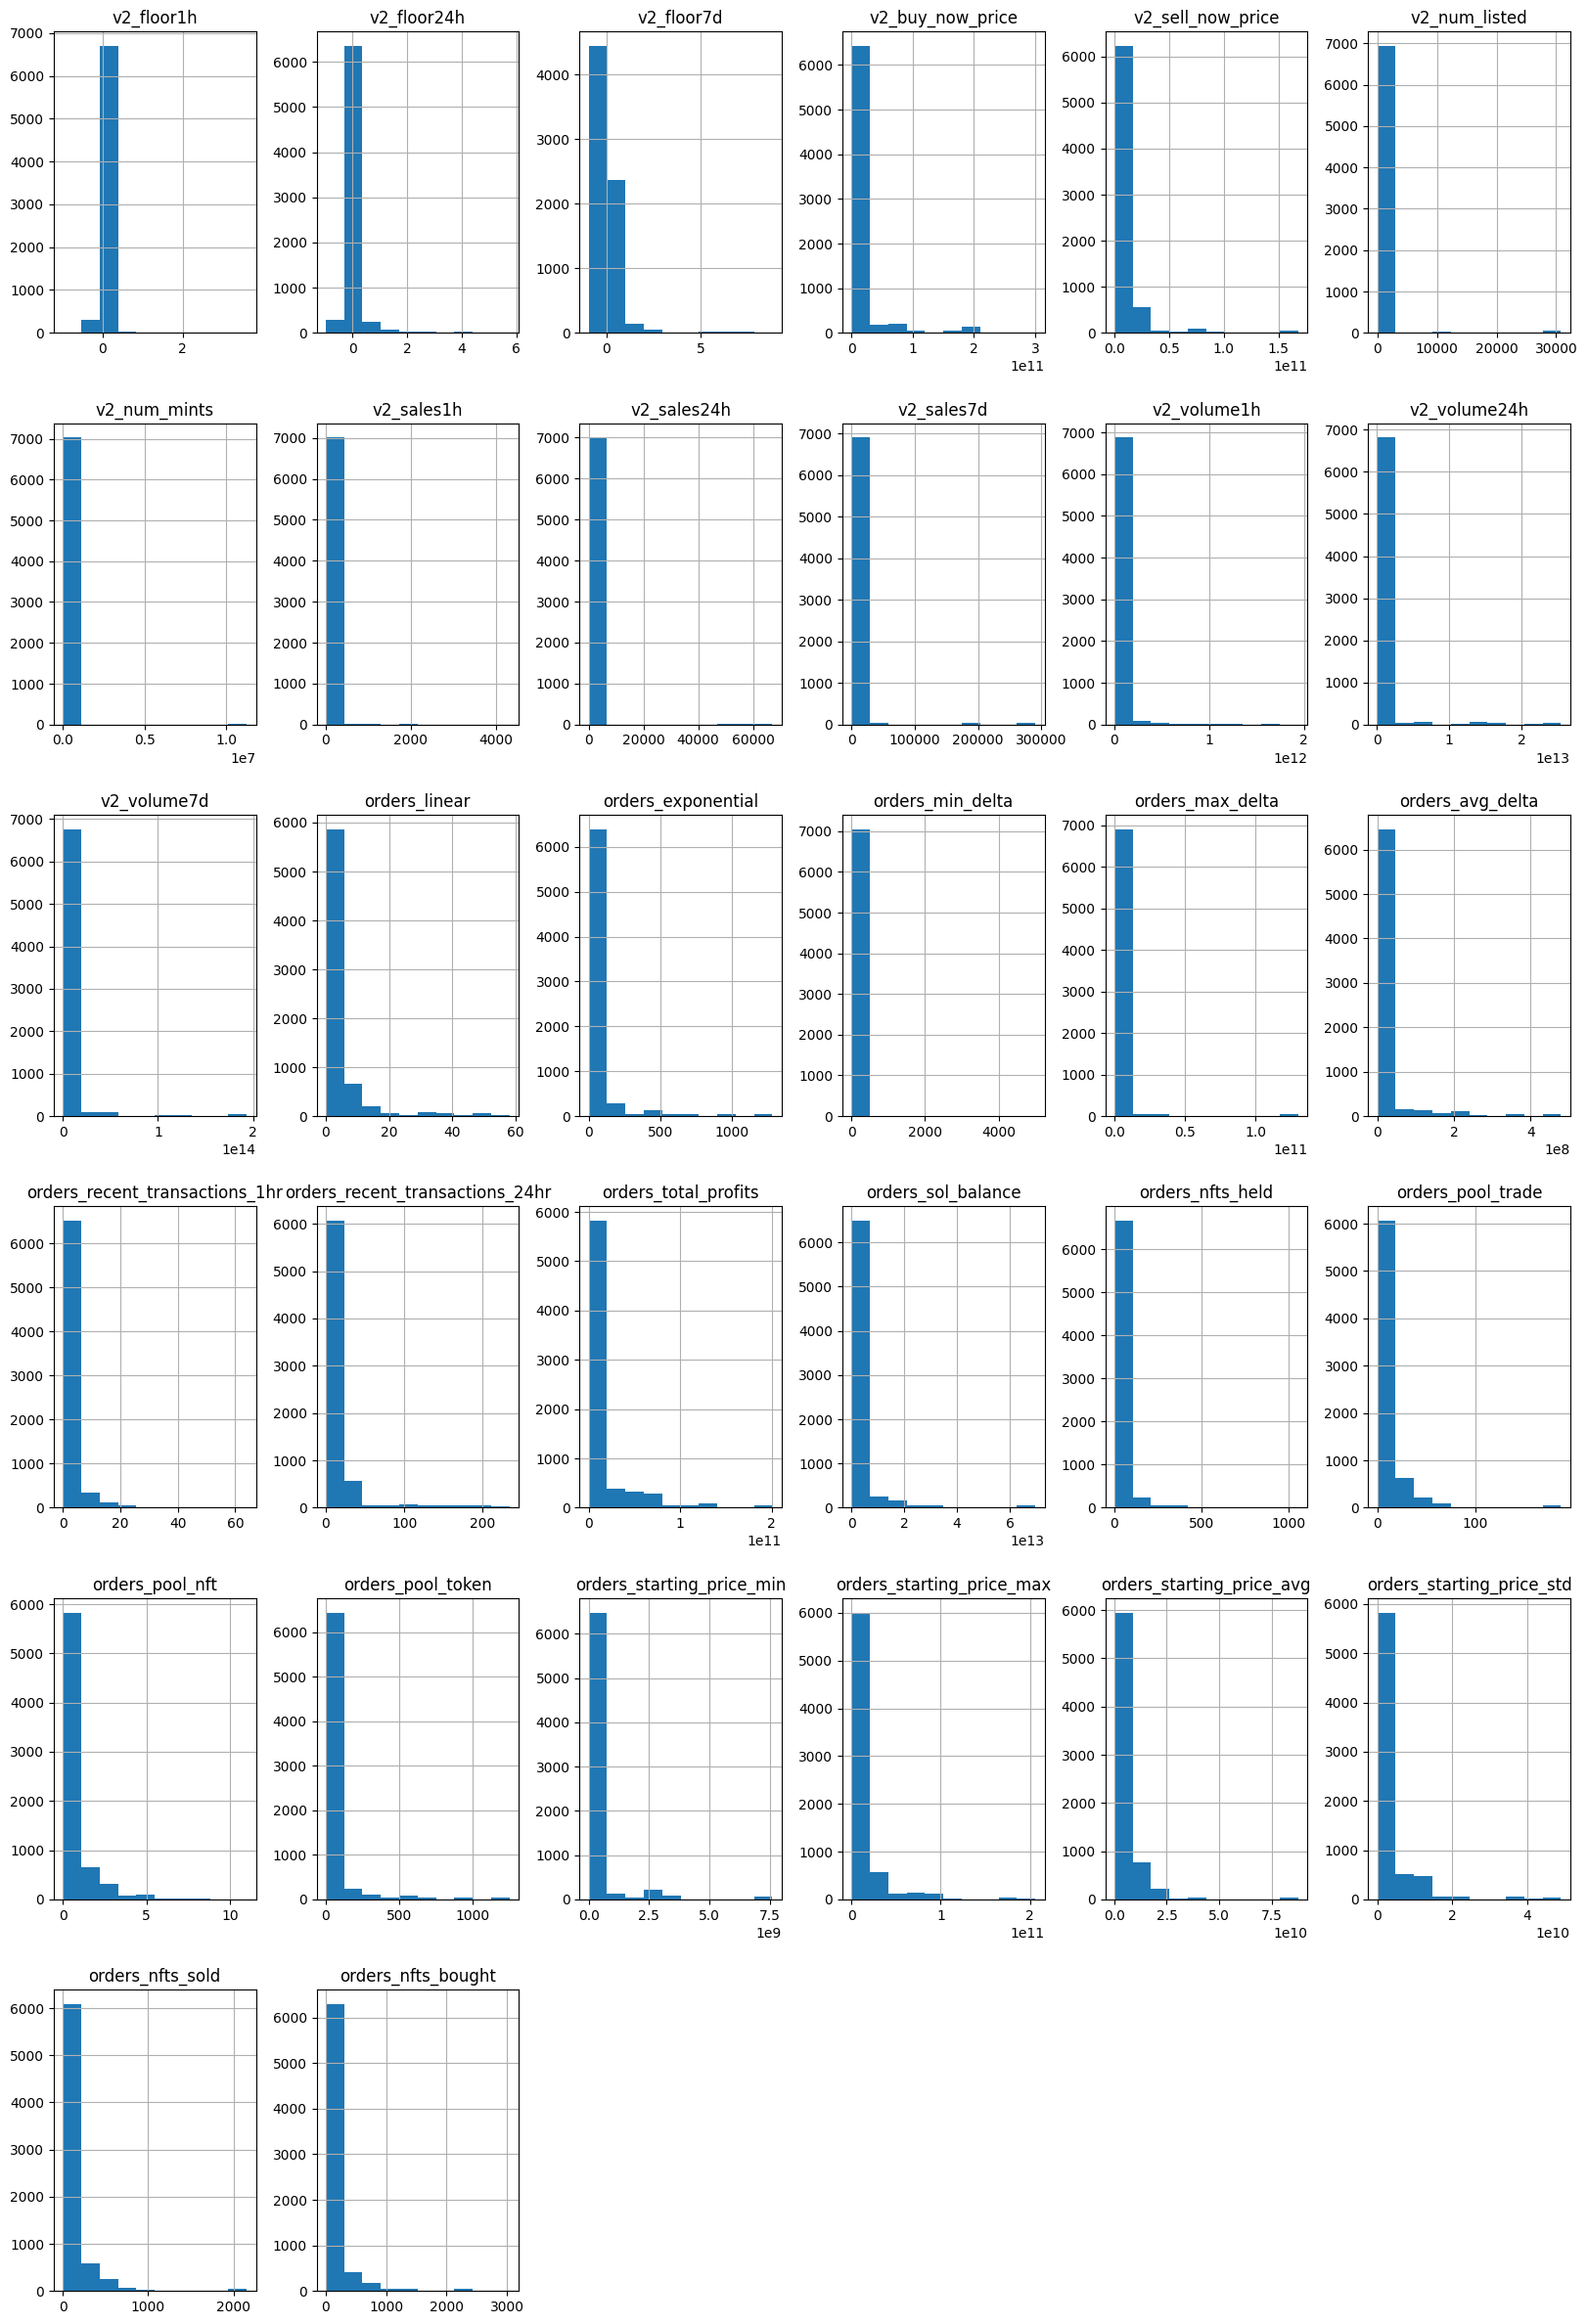

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(20,30))

In [ ]:

import seaborn as sns #importing seaborn library
pd.crosstab(df['orders_nfts_sold'],df['orders_nfts_bought'] )



orders_nfts_bought  0     1     2     3     4     5     6     7     8     \
orders_nfts_sold                                                           
0                   1199   395   243    52   212    71    11   197    57   
1                      0     0    47    40     4     0     0     0     2   
2                      0     0     0    35    33     4     2    33     3   
3                      0     0     0     0     0    24    17    50    51   
4                      0     0     0     0     0     0     0     0     0   
...                  ...   ...   ...   ...   ...   ...   ...   ...   ...   
2132                   0     0     0     0     0     0     0     0     0   
2134                   0     0     0     0     0     0     0     0     0   
2153                   0     0     0     0     0     0     0     0     0   
2155                   0     0     0     0     0     0     0     0     0   
2156                   0     0     0     0     0     0     0     0     0   

orders_nfts_bought  9     ...  2574  2630  2639  2641  2649  2654  2670  2780  \
orders_nfts_sold          ...                                                   
0                     94  ...     0     0     0     0     0     0     0     0   
1                     47  ...     0     0     0     0     0     0     0     0   
2                     29  ...     0     0     0     0     0     0     0     0   
3                      2  ...     0     0     0     0     0     0     0     0   
4                      3  ...     0     0     0     0     0     0     0     0   
...                  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
2132                   0  ...     0     0     0     0     0     0     0     0   
2134                   0  ...     0     0     0     0     0     0     0     0   
2153                   0  ...     0     0     0     0     0     0     0     0   
2155                   0  ...     0     0     0     0     0     0     0     0   
2156                   0  ...     0     0     0     0     0     0     0     0   

orders_nfts_bought  2979  3044  
orders_nfts_sold                
0                      0     0  
1                      0     0  
2                      0     0  
3                      0     0  
4                      0     0  
...                  ...   ...  
2132                   0     0  
2134                   0     0  
2153                   0     0  
2155                   0     0  
2156                   0     0  

[277 rows x 523 columns]

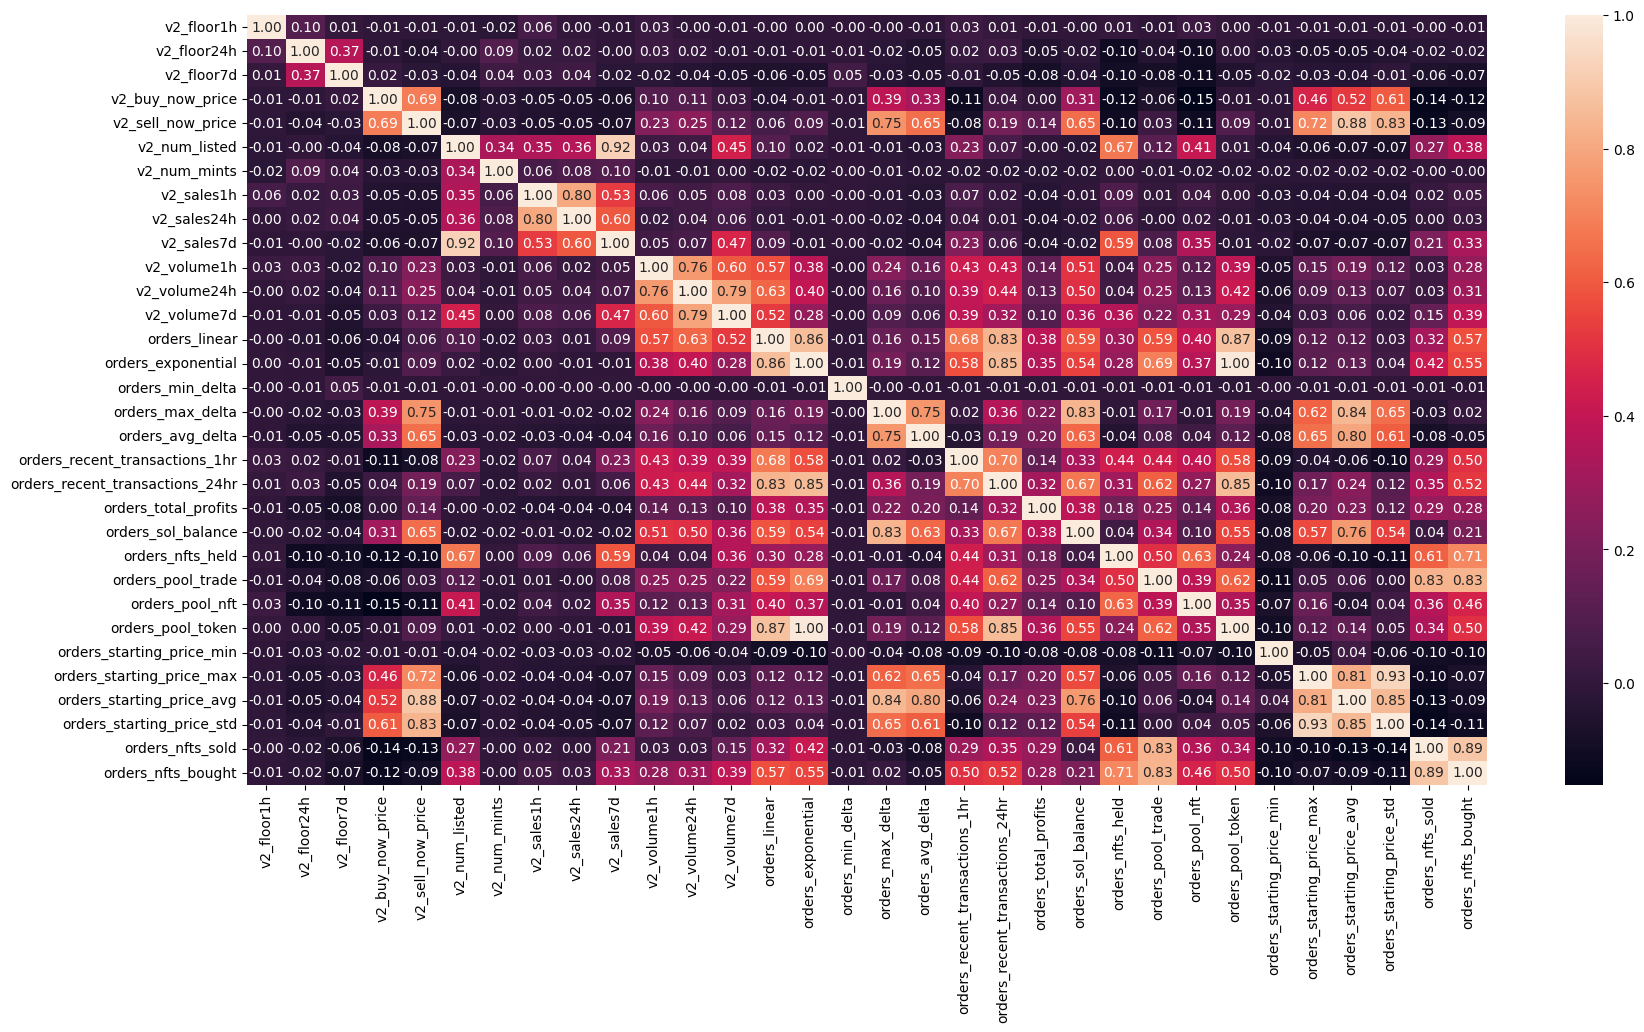

In [ ]:
plt.figure(figsize = (20, 10))

sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

plt.show()

In [ ]:
df['v2_floor1h'].std()

0.10849403642617696

In [ ]:
df['v2_buy_now_price'].std()

32744216120.888863

In [ ]:
df['v2_buy_now_price'].mean()

13859498919.450212

In [ ]:
df['v2_sell_now_price'].mean()

8585658591.431206

In [ ]:
df['v2_sell_now_price'].std()

18753954421.44381

In [ ]:
df['v2_floor24h'].mean()

0.05934756028368795

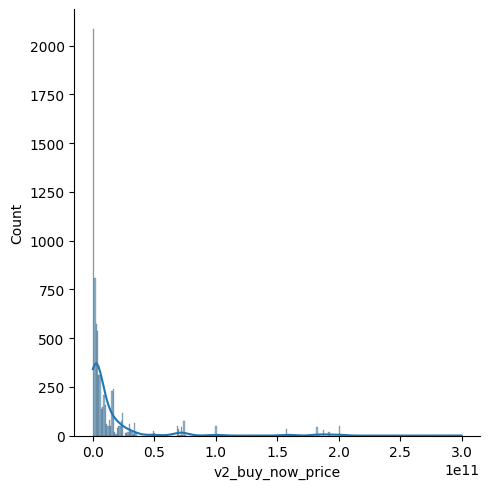

In [ ]:
sns.displot(data=df, x="v2_buy_now_price", kde=True)

sns.displot(data=df, x="v2_floor1h", kde=True)


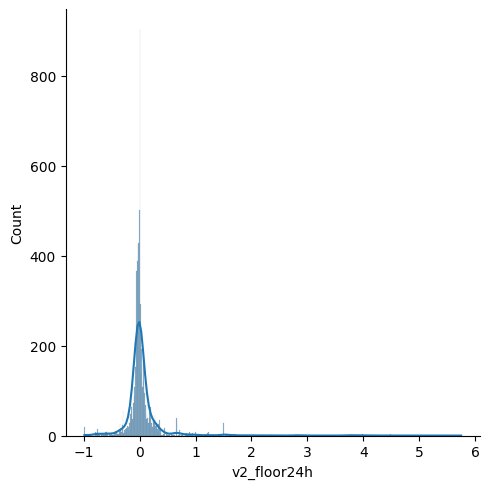

In [ ]:
sns.displot(data=df, x="v2_floor24h", kde=True)

In [ ]:
df.describe().T

count          mean           std  \
v2_floor1h                       7050.0  1.859702e-03  1.084940e-01   
v2_floor24h                      7050.0  5.934756e-02  4.447545e-01   
v2_floor7d                       7050.0  1.430445e-01  7.396420e-01   
v2_buy_now_price                 7050.0  1.385950e+10  3.274422e+10   
v2_sell_now_price                7050.0  8.585659e+09  1.875395e+10   
v2_num_listed                    7050.0  7.008735e+02  2.699574e+03   
v2_num_mints                     7050.0  4.318717e+04  5.985105e+05   
v2_sales1h                       7050.0  1.812553e+01  1.452022e+02   
v2_sales24h                      7050.0  6.442848e+02  4.840315e+03   
v2_sales7d                       7050.0  4.370015e+03  2.678953e+04   
v2_volume1h                      7050.0  2.338280e+10  1.090242e+11   
v2_volume24h                     7050.0  6.336403e+11  2.564183e+12   
v2_volume7d                      7050.0  4.567376e+12  1.909116e+13   
orders_linear                    7050.0  3.795745e+00  8.229988e+00   
orders_exponential               7050.0  6.874156e+01  1.584316e+02   
orders_min_delta                 7050.0  2.127660e+00  1.031275e+02   
orders_max_delta                 7050.0  1.688195e+09  1.096791e+10   
orders_avg_delta                 7050.0  1.956053e+07  6.186683e+07   
orders_recent_transactions_1hr   7050.0  1.755745e+00  3.968120e+00   
orders_recent_transactions_24hr  7050.0  1.491050e+01  3.407413e+01   
orders_total_profits             7050.0  1.307613e+10  2.868015e+10   
orders_sol_balance               7050.0  2.448504e+12  7.037054e+12   
orders_nfts_held                 7050.0  2.664695e+01  6.830502e+01   
orders_pool_trade                7050.0  8.736312e+00  1.889865e+01   
orders_pool_nft                  7050.0  6.832624e-01  1.231112e+00   
orders_pool_token                7050.0  6.311773e+01  1.527240e+02   
orders_starting_price_min        7050.0  2.779357e+08  9.439895e+08   
orders_starting_price_max        7050.0  1.425333e+10  2.578771e+10   
orders_starting_price_avg        7050.0  5.028372e+09  8.880934e+09   
orders_starting_price_std        7050.0  3.397366e+09  6.364586e+09   
orders_nfts_sold                 7050.0  9.109858e+01  2.203496e+02   
orders_nfts_bought               7050.0  1.297257e+02  3.002839e+02   

                                          min           25%           50%  \
v2_floor1h                      -9.860000e-01 -3.000000e-04  0.000000e+00   
v2_floor24h                     -9.870000e-01 -4.867500e-02 -3.700000e-03   
v2_floor7d                      -9.309000e-01 -9.830000e-02  0.000000e+00   
v2_buy_now_price                 1.900000e+05  7.370526e+08  3.280000e+09   
v2_sell_now_price                1.500000e+04  5.788215e+08  2.800000e+09   
v2_num_listed                    0.000000e+00  9.425000e+01  3.240000e+02   
v2_num_mints                     5.000000e+01  2.222000e+03  5.000000e+03   
v2_sales1h                       0.000000e+00  0.000000e+00  1.000000e+00   
v2_sales24h                      1.000000e+00  8.000000e+00  2.700000e+01   
v2_sales7d                       1.000000e+00  5.100000e+01  1.570000e+02   
v2_volume1h                      0.000000e+00  0.000000e+00  8.200000e+08   
v2_volume24h                     1.707922e+10  3.066636e+10  7.896053e+10   
v2_volume7d                      1.783453e+10  1.882978e+11  4.878908e+11   
orders_linear                    0.000000e+00  0.000000e+00  1.000000e+00   
orders_exponential               0.000000e+00  1.000000e+01  2.000000e+01   
orders_min_delta                 0.000000e+00  0.000000e+00  0.000000e+00   
orders_max_delta                 0.000000e+00  5.000000e+03  9.900000e+03   
orders_avg_delta                 0.000000e+00  5.506452e+02  3.800000e+03   
orders_recent_transactions_1hr   0.000000e+00  0.000000e+00  0.000000e+00   
orders_recent_transactions_24hr  0.000000e+00  2.000000e+00  4.000000e+00   
orders_total_profits             0.000000e+00  0.000000e+00  9.041860e+08

In [ ]:
df.describe(exclude = 'number').T


count unique                         top freq
slug_display       7050    181             famous_fox_dens   48
first_list_date    7050    181         2021-12-19 02:15:20   48
name               7050    181             Famous Fox Dens   48
data_retrieved_at  7050   7050  2024-01-21 15:42:43.792791    1

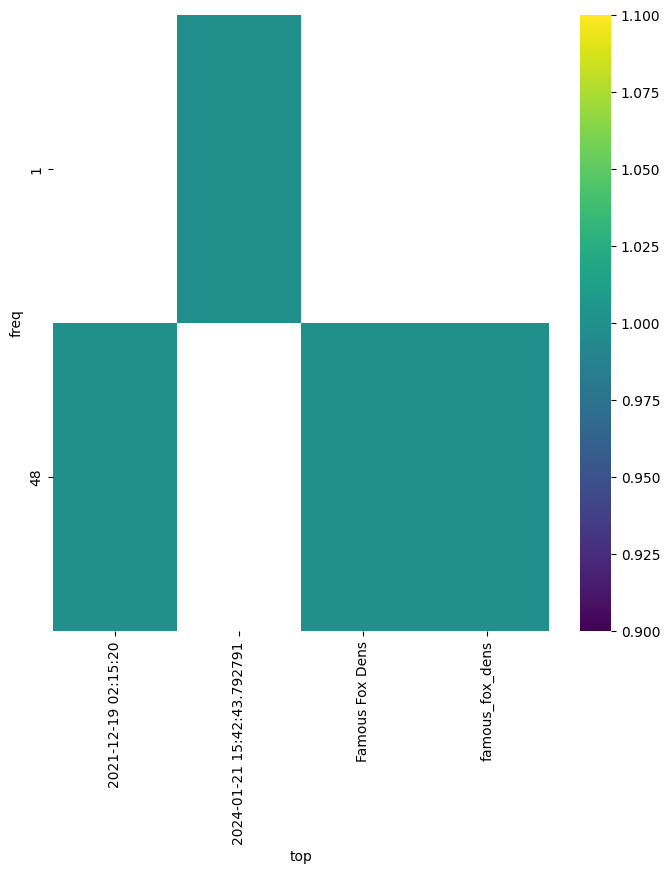

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['freq'].value_counts()
    for x_label, grp in _df_4.groupby('top')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('top')
_ = plt.ylabel('freq')

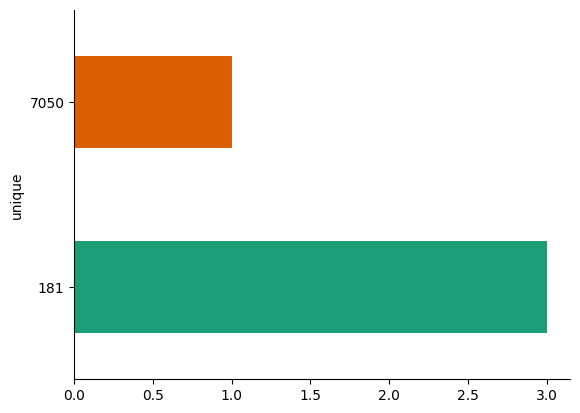

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('unique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Making a list of all categorical variables
cat_col = ['slug_display', 'first_list_date', 'data_retrieved_at', 'name']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 50)

famous_fox_dens     48
cryptoundeads       47
rascals             47
moneypenny          47
heroes_of_elumia    47
                    ..
bape                 2
goofies              2
bonkznft             2
crayon_pass          2
liquidator_x         1
Name: slug_display, Length: 181, dtype: int64
--------------------------------------------------
2021-12-19 02:15:20    48
2024-01-16 22:53:24    47
2022-05-21 09:37:52    47
2023-12-22 21:25:27    47
2022-10-27 14:58:13    47
                       ..
2021-12-19 21:11:55     2
2024-01-15 16:34:29     2
2023-01-30 19:35:59     2
2024-01-15 01:16:41     2
2023-05-11 02:57:54     1
Name: first_list_date, Length: 181, dtype: int64
--------------------------------------------------
2024-01-21 15:42:43.792791    1
2024-01-22 01:33:18.237088    1
2024-01-22 01:33:28.945422    1
2024-01-22 01:33:27.776728    1
2024-01-22 01:33:27.058694    1
                             ..
2024-01-21 20:34:30.940258    1
2024-01-21 20:34:30.337658    1
2024-01-

In [ ]:
# prompt: i have a column for data_retrieved_at that is not in the right data type form its currently an object and it looks like this 2024-01-21 15:42:43.792791  i need to convert this to a proper date time format for use in my model

df['data_retrieved_at'] = pd.to_datetime(df['data_retrieved_at'], format='%Y-%m-%d %H:%M:%S.%f')


In [ ]:
df.dtypes

slug_display                               object
v2_floor1h                                float64
v2_floor24h                               float64
v2_floor7d                                float64
v2_buy_now_price                          float64
v2_sell_now_price                         float64
v2_num_listed                               int64
v2_num_mints                                int64
v2_sales1h                                  int64
v2_sales24h                                 int64
v2_sales7d                                  int64
v2_volume1h                                 int64
v2_volume24h                                int64
v2_volume7d                                 int64
first_list_date                            object
name                                       object
data_retrieved_at                  datetime64[ns]
orders_linear                               int64
orders_exponential                          int64
orders_min_delta                          float64


In [ ]:
# prompt: how can i separate the names of the nft's in the column slug, so that i can run my data through a deep neural net but then be able to test the prediction for the price on that nft

df['nft_name'] = df['slug_display'].str.split('/').str[-1]
df.head()


slug_display  v2_floor1h  v2_floor24h  v2_floor7d  v2_buy_now_price  \
0    cryptoundeads     -0.0217       0.1445      0.0000      1.125000e+10   
1       tensorians     -0.0004      -0.0741     -0.1951      7.439000e+10   
2         froganas      0.0085       0.3537      0.1273      6.200000e+09   
3  sujiko_warriors     -0.0197       0.0473      0.0000      5.980000e+09   
4          madlads     -0.0101      -0.0117      0.0125      1.620000e+11   

   v2_sell_now_price  v2_num_listed  v2_num_mints  v2_sales1h  v2_sales24h  \
0       1.231000e+10            743         10000          69         1745   
1       7.630000e+10            342         10003           5          200   
2       6.530000e+09            982          5555         251         1993   
3       6.281515e+09            404          4444         245          753   
4       1.680100e+11            412          9968           1           22   

   ...  orders_pool_trade  orders_pool_nft  orders_pool_token  \
0  ...                 40                3                495   
1  ...                  0                0                  0   
2  ...                 66                1                684   
3  ...                 21                1                346   
4  ...                 44                0                312   

   orders_starting_price_min orders_starting_price_max  \
0                        0.0              1.450000e+10   
1                  3000000.0              6.790000e+09   
2                        0.0              1.900000e+10   
3                        0.0              2.000000e+10   
4                        0.0              1.792100e+11   

  orders_starting_price_avg orders_starting_price_std  orders_nfts_sold  \
0              7.497594e+09              3.471032e+09               115   
1              2.271678e+09              1.370111e+09                 0   
2              4.410737e+09              1.856737e+09               227   
3              4.706550e+09              2.053297e+09                10   
4              8.744950e+10              4.878455e+10                17   

   orders_nfts_bought         nft_name  
0                 700    cryptoundeads  
1                   0       tensorians  
2                1391         froganas  
3                 133  sujiko_warriors  
4                 144          madlads  

[5 rows x 37 columns]

In [ ]:
df.dtypes

slug_display                               object
v2_floor1h                                float64
v2_floor24h                               float64
v2_floor7d                                float64
v2_buy_now_price                          float64
v2_sell_now_price                         float64
v2_num_listed                               int64
v2_num_mints                                int64
v2_sales1h                                  int64
v2_sales24h                                 int64
v2_sales7d                                  int64
v2_volume1h                                 int64
v2_volume24h                                int64
v2_volume7d                                 int64
first_list_date                            object
name                                       object
data_retrieved_at                  datetime64[ns]
orders_linear                               int64
orders_exponential                          int64
orders_min_delta                          float64


In [ ]:
df.isnull().sum()

slug_display                       0
v2_floor1h                         0
v2_floor24h                        0
v2_floor7d                         0
v2_buy_now_price                   0
v2_sell_now_price                  0
v2_num_listed                      0
v2_num_mints                       0
v2_sales1h                         0
v2_sales24h                        0
v2_sales7d                         0
v2_volume1h                        0
v2_volume24h                       0
v2_volume7d                        0
first_list_date                    0
name                               0
data_retrieved_at                  0
orders_linear                      0
orders_exponential                 0
orders_min_delta                   0
orders_max_delta                   0
orders_avg_delta                   0
orders_recent_transactions_1hr     0
orders_recent_transactions_24hr    0
orders_total_profits               0
orders_sol_balance                 0
orders_nfts_held                   0
o

<Axes: >

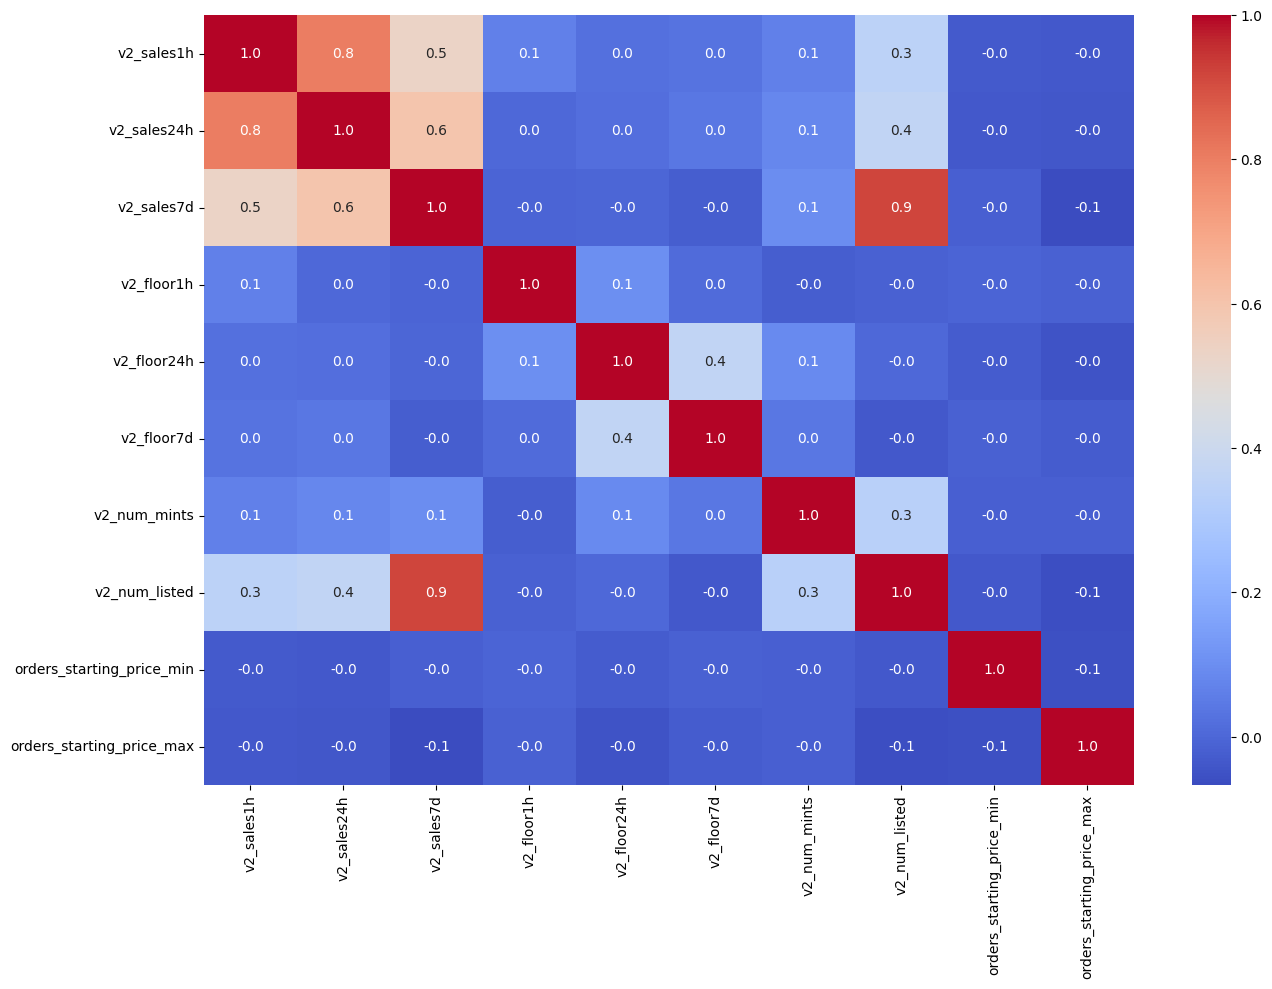

In [ ]:
# Check for correlation among numerical variables
num_var = ['v2_sales1h', 'v2_sales24h', 'v2_sales7d', 'v2_floor1h', 'v2_floor24h', 'v2_floor7d', 'v2_num_mints', 'v2_num_listed', 'orders_starting_price_min', 'orders_starting_price_max' ]
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

In [ ]:
import pandas as pd
from datetime import datetime

# Assuming your dataset is stored in a variable called df
# Replace 'YourNFTNameColumn', 'YourPriceColumn', and 'data_retrieved_at' with actual column names

# Select specific columns
df = df[['slug_display', 'v2_floor1h', 'data_retrieved_at']]

# Convert 'data_retrieved_at' to datetime
df['data_retrieved_at'] = pd.to_datetime(df['data_retrieved_at'])

# Sort DataFrame by time
df.sort_values(by='data_retrieved_at', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Now, df is sorted by time and contains only the desired columns


In [ ]:
df

slug_display  v2_floor1h          data_retrieved_at
0         cryptoundeads     -0.0217 2024-01-21 15:42:43.792791
1            tensorians     -0.0004 2024-01-21 15:42:44.816331
2              froganas      0.0085 2024-01-21 15:42:46.798134
3       sujiko_warriors     -0.0197 2024-01-21 15:42:48.695264
4               madlads     -0.0101 2024-01-21 15:42:49.965595
...                 ...         ...                        ...
7045  honeyland_tickets      0.0000 2024-01-22 06:26:58.768842
7046              airia      0.0000 2024-01-22 06:26:59.590504
7047           bonkznft     -0.0321 2024-01-22 06:27:00.547002
7048                mdp      0.0000 2024-01-22 06:27:01.383964
7049         lilbonkerz     -0.0011 2024-01-22 06:27:01.899090

[7050 rows x 3 columns]

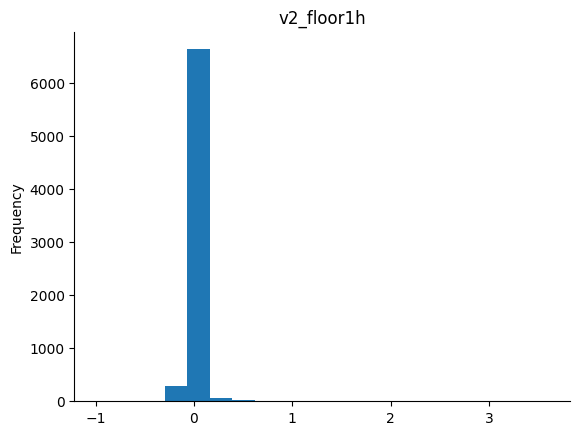

In [ ]:
from matplotlib import pyplot as plt
df['v2_floor1h'].plot(kind='hist', bins=20, title='v2_floor1h')
plt.gca().spines[['top', 'right',]].set_visible(False)

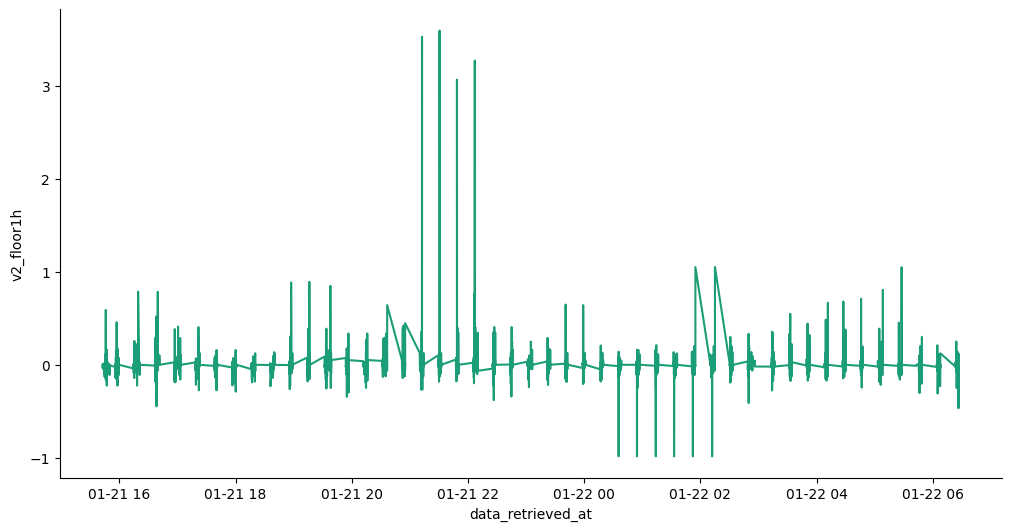

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['data_retrieved_at']
  ys = series['v2_floor1h']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('data_retrieved_at', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('data_retrieved_at')
_ = plt.ylabel('v2_floor1h')

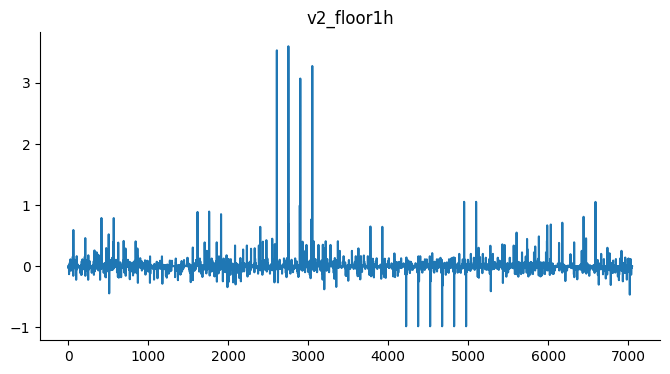

In [ ]:
from matplotlib import pyplot as plt
df['v2_floor1h'].plot(kind='line', figsize=(8, 4), title='v2_floor1h')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Assuming df is your DataFrame after the previous operations

# Group by NFT name
grouped_df = df.groupby('slug_display')

# Iterate over groups
for name, group in grouped_df:
    print(f"NFT Name: {name}")
    print(group[['data_retrieved_at', 'v2_floor1h']])
    print("\n")


Streaming output truncated to the last 5000 lines.
2800 2024-01-21 21:31:26.210532      0.0000
2948 2024-01-21 21:49:22.385225      0.0000
3096 2024-01-21 22:08:57.612591      0.0000
3246 2024-01-21 22:27:35.744907      0.0000
3400 2024-01-21 22:45:40.691436      0.0000
3547 2024-01-21 23:05:05.648861      0.0909
3697 2024-01-21 23:23:54.511231      0.0808
3845 2024-01-21 23:42:14.883545      0.0808
3998 2024-01-22 00:00:16.197312     -0.0093
4148 2024-01-22 00:18:35.044223      0.0000
4298 2024-01-22 00:37:21.337906      0.0093
4448 2024-01-22 00:56:49.697285      0.0093
4598 2024-01-22 01:15:31.229290      0.0093
4750 2024-01-22 01:34:41.256425      0.0000
4901 2024-01-22 01:53:49.517291      0.0000
5050 2024-01-22 02:14:07.348968      0.0000
5202 2024-01-22 02:32:30.967799      0.0000
5351 2024-01-22 02:51:16.181837      0.0000
5501 2024-01-22 03:15:46.717365      0.0000
5646 2024-01-22 03:33:43.488251      0.0556
5795 2024-01-22 03:51:42.275007      0.0556
5946 2024-01-22 04:11:00.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming df is your DataFrame after the previous operations

# Group by NFT name
grouped_df = df.groupby('slug_display')

# Initialize the Linear Regression model
model = LinearRegression()

# Iterate over groups and fit the model for each NFT
for name, group in grouped_df:
    # Extract features (time) and target variable (price)
    X = group['data_retrieved_at'].values.reshape(-1, 1)
    y = group['v2_floor1h'].values.reshape(-1, 1)

    # Fit the model
    model.fit(X, y)

    # Now you can use the model for predictions or extract coefficients, etc.
    # For example, you can print the slope (coefficient) of the linear regression
    # print the predicted values for v2_floor1h
    print()
    print(f"NFT Name: {name}")
    print(f"Slope (Coefficient): {model.coef_[0][0]}")
    print("\n")


NFT Name: 8626_the_rain
Slope (Coefficient): -3.5397638326848577e-14


NFT Name: a_letter_from_the_universe
Slope (Coefficient): -9.340956895222725e-16


NFT Name: airia
Slope (Coefficient): -1.7609841631172053e-16


NFT Name: alpha_gardener
Slope (Coefficient): -4.445892288447765e-16


NFT Name: alpha_pharaohs
Slope (Coefficient): -1.6135030141686947e-16


NFT Name: amulet_metabears_basic
Slope (Coefficient): -4.586328086888848e-17


NFT Name: anniytvnnvwqgs3fecsbmwgw4ziggqd5qtnt1f15emru
Slope (Coefficient): 6.683555189433418e-17


NFT Name: assetdash_vanta
Slope (Coefficient): 7.193224647533944e-17


NFT Name: athenatools
Slope (Coefficient): 1.379730815170837e-15


NFT Name: aurory
Slope (Coefficient): 6.317643164812512e-17


NFT Name: bankmen
Slope (Coefficient): 6.1713331316263074e-18


NFT Name: banx
Slope (Coefficient): 3.0953572091020534e-16


NFT Name: bape
Slope (Coefficient): 0.0


NFT Name: bascv2
Slope (Coefficient): -1.742883961511718e-16


NFT Name: beetdao
Slope (Coeffi

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming df is your DataFrame after the previous operations

# Group by NFT name
grouped_df = df.groupby('slug_display')

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize an array to store predicted values for each group
predicted_values = []

# Iterate over groups and fit the model for each NFT
for name, group in grouped_df:
    # Extract features (time) and target variable (price)
    X = group['data_retrieved_at'].values.astype(np.int64) // 10**9  # Convert to Unix timestamp
    X = X.reshape(-1, 1)
    y = group['v2_floor1h'].values.reshape(-1, 1)

    # Fit the model
    model.fit(X, y)

    # Predict the next several data points (adjust the range as needed)
    future_data_points = np.arange(np.max(X), np.max(X) + 10).reshape(-1, 1)
    predicted_values.extend(model.predict(future_data_points))

    # Print the results for the current NFT
    print()
    print(f"NFT Name: {name}")
    print(f"Slope (Coefficient): {model.coef_[0][0]}")
    print("Predicted Values for v2_floor1h:")
    print(predicted_values)
    print("\n")



NFT Name: 8626_the_rain
Slope (Coefficient): -3.5399199532837055e-05
Predicted Values for v2_floor1h:
[array([-0.06193312]), array([-0.06196852]), array([-0.06200392]), array([-0.06203932]), array([-0.06207472]), array([-0.06211012]), array([-0.06214552]), array([-0.06218092]), array([-0.06221632]), array([-0.06225171])]



NFT Name: a_letter_from_the_universe
Slope (Coefficient): -9.340854255600373e-07
Predicted Values for v2_floor1h:
[array([-0.06193312]), array([-0.06196852]), array([-0.06200392]), array([-0.06203932]), array([-0.06207472]), array([-0.06211012]), array([-0.06214552]), array([-0.06218092]), array([-0.06221632]), array([-0.06225171]), array([-0.01735737]), array([-0.01735831]), array([-0.01735924]), array([-0.01736018]), array([-0.01736111]), array([-0.01736204]), array([-0.01736298]), array([-0.01736391]), array([-0.01736485]), array([-0.01736578])]



NFT Name: airia
Slope (Coefficient): -1.7609358554781495e-07
Predicted Values for v2_floor1h:
[array([-0.06193312])

In [ ]:
df.dtypes

slug_display                 object
v2_floor1h                  float64
data_retrieved_at    datetime64[ns]
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df_next is your DataFrame with the 'slug_display' column
# Replace 'slug_display' with the actual column name

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'slug_display' column
df_next['encoded_slug'] = label_encoder.fit_transform(df_next['slug_display'])

# Now, df_next['encoded_slug'] contains the label-encoded values
# You can use df_next['encoded_slug'] as a feature in your deep neural network


KeyError: 'slug_display'

In [ ]:
df_next.dtypes

In [ ]:
df_next.drop(columns=['slug_display'], inplace=True)

In [ ]:
df_next.head()

In [ ]:
# One-hot encoding for categorical variables
df_next  = pd.get_dummies(df, drop_first=True)


In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns (excluding one-hot encoded columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
from sklearn.model_selection import train_test_split

# Define your target variable, replace 'target' with the name of your target column
target = 'v2_floor1h'

# Splitting the data into training and testing sets
X = df_next.drop(target, axis=1)
y = df_next[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Dense(units=3, input_shape=(None, 8152)))
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
class MyOptimizer(tf.keras.optimizers.Optimizer):

    def __init__(self, learning_rate=0.001):
        super().__init__(learning_rate)
        self.learning_rate = learning_rate

    def get_config(self):
        config = super().get_config()
        config.update({
            "learning_rate": self.learning_rate,
        })
        return config

    def compute_gradients(self, loss, var_list):
        gradients = tf.gradients(loss, var_list)
        gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
        return gradients, var_list

In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()


In [ ]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

In [ ]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results = model.evaluate(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

Model 2

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1 = Sequential()
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)


In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()